# Benchmark TenSEAL

In [9]:
from time import time 
import random as rand
import numpy as np
import pandas as pd
import tenseal as ts
import matplotlib.pyplot as plt

rand.seed(777)
mean_soma_bfv = []
mean_prod_bfv = []

In [41]:
context = ts.context(
                ts.SCHEME_TYPE.BFV, 
                poly_modulus_degree=8192,
                plain_modulus=1032193)

In [40]:
duration_bfv = []
duration_comm = []
sizes = [100, 1000, 10000, 100000, 1000000, 10000000]
for size in sizes:
    L = [rand.randint(0,100000) for _ in range(size)]
    aux = [rand.randint(0,100000) for _ in range(size)]
    t_start = time()
    encv = ts.bfv_vector(context, L)
    result = encv + aux
    t_end = time()
    duration_bfv.append((t_end - t_start) * 1000)
    print("*BFV c2p {} sum time*: {:.2f} ms".format(size, duration_bfv[-1]))
    t_start = time()
    S = np.array(L) + np.array(aux)
    t_end = time()
    duration_comm.append((t_end - t_start) * 1000)
    print("**Commom {} sum time*: {:.2f} ms".format(size, duration_comm[-1]))
    z = result.decrypt()
    print("Are Equal?", sum(z) == sum(S))
    

ValueError: encryption parameters are not valid for batching

[]

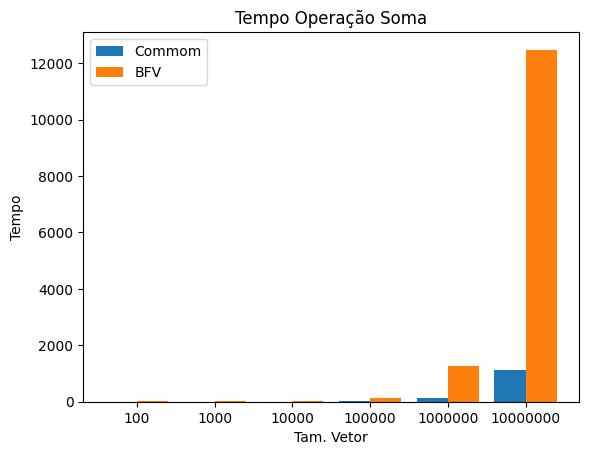

In [ ]:
w, x = 0.4, np.arange(len(sizes))

fig, ax = plt.subplots()
ax.bar(x - w/2, duration_comm, width=w, label='Commom')
ax.bar(x + w/2, duration_bfv, width=w, label='BFV')

ax.set_xticks(x)
ax.set_xticklabels(sizes)
ax.set_ylabel('Tempo')
ax.set_xlabel('Tam. Vetor')
ax.set_title('Tempo Operação Soma')
ax.legend()

ax.plot()

In [35]:
mean_soma_bfv.append(sum(duration_bfv)/float(len(duration_bfv)))

ZeroDivisionError: float division by zero

In [ ]:
duration_bfv = []
duration_comm = []
sizes = [100, 1000, 10000, 100000, 1000000, 10000000]
for size in sizes:
    
    L = [rand.randint(0,100) for _ in range(size)]
    aux = [rand.randint(0,100) for _ in range(size)]
    #aux = [1 for _ in range(size)]
    #context.generate_galois_keys()
    #context.global_scale = 2**40
    t_start = time()
    #context.generate_relin_keys()
    encv = ts.bfv_vector(context, L)
    result = encv * aux
    t_end = time()
    duration_bfv.append((t_end - t_start) * 1000)
    print("*BFV c2p {} mult time*: {:.2f} ms".format(size, duration_bfv[-1]))
    t_start = time()
    S = np.array(L) * np.array(aux)
    t_end = time()
    duration_comm.append((t_end - t_start) * 1000)
    print("**Commom {} sum time*: {:.2f} ms".format(size, duration_comm[-1]))
    z = result.decrypt()
    print("Are Equal?", sum(z) == sum(S))
    

ValueError: encryption parameters are not valid for batching

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

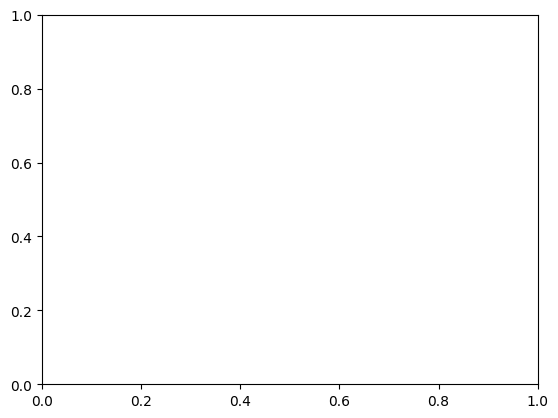

In [37]:
w, x = 0.4, np.arange(len(sizes))

fig, ax = plt.subplots()
ax.bar(x - w/2, duration_comm, width=w, label='Commom')
ax.bar(x + w/2, duration_bfv, width=w, label='BFV')

ax.set_xticks(x)
ax.set_xticklabels(sizes)
ax.set_ylabel('Tempo')
ax.set_xlabel('Tam. Vetor')
ax.set_title('Tempo Operação Produto')
ax.legend()

ax.plot()

In [38]:
mean_prod_bfv.append(sum(duration_bfv)/float(len(duration_bfv)))

ZeroDivisionError: float division by zero

In [ ]:
mean_soma_bfv

[3084.477663040161, 2941.104809443156, 2321.3897546132407]

In [43]:
mean_prod_bfv

[2230.887015660604, 2211.025834083557, 2111.0218365987143]

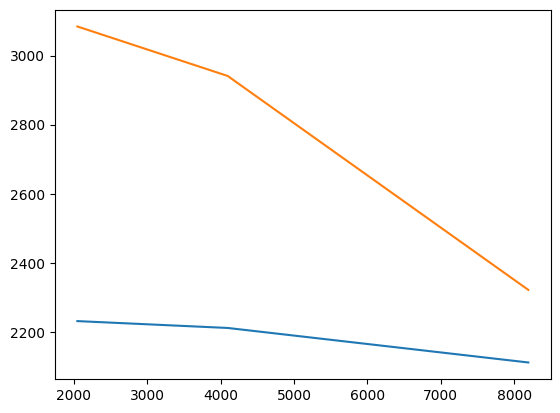

In [48]:
plt.plot([2048, 4096, 8192], mean_prod_bfv)
plt.plot([2048, 4096, 8192], mean_soma_bfv)



In [ ]:
duration_bfv = []
duration_comm = []
sizes = [100]#, 1000, 10000, 100000, 1000000, 10000000]
for size in sizes:
    L = [rand.randint(0,100) for _ in range(size)]
    aux = [rand.randint(0,100) for _ in range(size)]
    encv2 = ts.bfv_vector(context, L)
    encv1 = ts.bfv_vector(context, L)
    result = encv1 + encv2
    result.decrypt()
    

In [ ]:
result = encv1 + encv2
result.decrypt()

result.square

<bound method AbstractTensor.square of <tenseal.tensors.bfvvector.BFVVector object at 0x000001E3DB47F380>>